# Import Libraries

In [1]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
str_punc = string.punctuation.replace(',', '').replace("'",'')

def clean(text):
    global str_punc
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return text    

# Read dataset & Preprocess text

In [3]:
df_train = pd.read_csv('D:\\New folder\\train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('D:\\New folder\\val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('D:\\New folder\\test.txt', names=['Text', 'Emotion'], sep=';')

df_test = df_test[df_test['Emotion'].isin(['sadness','anger','joy','fear','love','surprise'])]
df_val = df_val[df_val['Emotion'].isin(['sadness','anger','joy','fear','love','surprise'])]
df_train = df_train[df_train['Emotion'].isin(['sadness','anger','joy','fear','love','surprise'])]

X_train = df_train['Text'].apply(clean)
y_train = df_train['Emotion']

X_test = df_test['Text'].apply(clean)
y_test = df_test['Emotion']

X_val = df_val['Text'].apply(clean)
y_val = df_val['Emotion']

# Visualize classes counts

C:\Users\amitr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


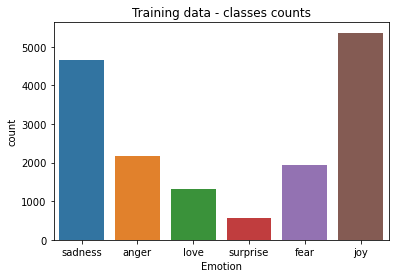

C:\Users\amitr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


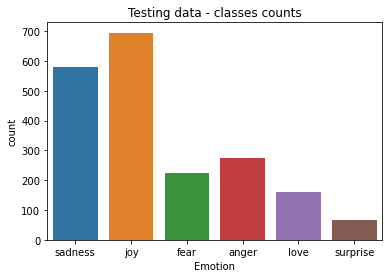

C:\Users\amitr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


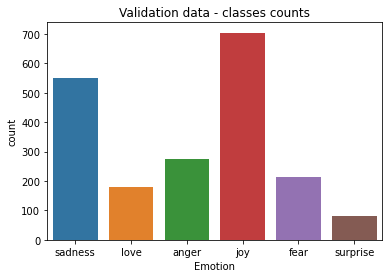

In [4]:
sns.countplot(y_train)
plt.title("Training data - classes counts")
plt.show()

sns.countplot(y_test)
plt.title("Testing data - classes counts")
plt.show()

sns.countplot(y_val)
plt.title("Validation data - classes counts")
plt.show()

# Import Libraries

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode labels

In [6]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# Tokenize words

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))


sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

X_train = pad_sequences(sequences_train, maxlen=256, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=256, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=256, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 16185


# Embedding

In [8]:
max_features = 20000
maxlen = 100
embedding_size = 128

# Importing the Dependencies

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Flatten, Input

# Build The Model

In [10]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(Embedding(vocabSize, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(128, return_sequences=True)),
model.add(Dropout(0.2))  ,
model.add(LSTM(64)),
model.add(Dropout(0.2))  ,
model.add(Dense(128, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(64, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(6))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 128)          2071680   
                                                                 
 lstm (LSTM)                 (None, 256, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 256, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

# Train The Model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [12]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=60,
                   )

Epoch 1/60
63/63 [==============================] - 77s 1s/step - loss: 1.5975 - accuracy: 0.3247 - val_loss: 1.4697 - val_accuracy: 0.3845
Epoch 2/60
63/63 [==============================] - 73s 1s/step - loss: 1.1267 - accuracy: 0.5349 - val_loss: 0.8785 - val_accuracy: 0.6605
Epoch 3/60
63/63 [==============================] - 76s 1s/step - loss: 0.6091 - accuracy: 0.7697 - val_loss: 0.6348 - val_accuracy: 0.7930
Epoch 4/60
63/63 [==============================] - 78s 1s/step - loss: 0.3334 - accuracy: 0.8891 - val_loss: 0.5070 - val_accuracy: 0.8495
Epoch 5/60
63/63 [==============================] - 77s 1s/step - loss: 0.2092 - accuracy: 0.9329 - val_loss: 0.4871 - val_accuracy: 0.8680
Epoch 6/60
63/63 [==============================] - 78s 1s/step - loss: 0.1422 - accuracy: 0.9556 - val_loss: 0.5065 - val_accuracy: 0.8715
Epoch 7/60
63/63 [==============================] - 78s 1s/step - loss: 0.1142 - accuracy: 0.9656 - val_loss: 0.4978 - val_accuracy: 0.8745
Epoch 8/60
63/63 [==

# Evaluate Accuracy

In [16]:
model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 3s 47ms/step - loss: 0.7109 - accuracy: 0.8970


[0.7108979225158691, 0.8970000147819519]

# Plot The Accuracy

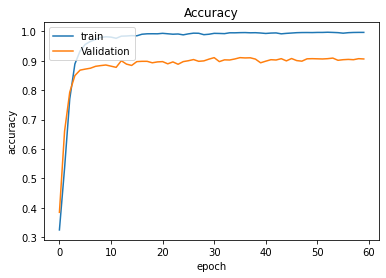

In [17]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

# Plot The Loss

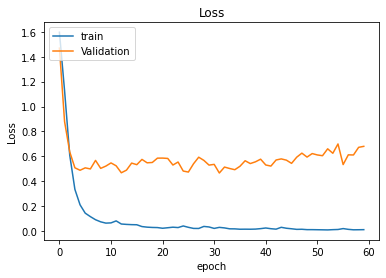

In [18]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()